# Data Science Task -  Analyzing the IMDB Dataset of Top 1000 Movies and TV Shows using Pandas


In this task you are requested to analyze the top rated movies and TV shows on IMDB Dataset to find out which genre is the most popular and which director has the most top-rated movies/TV shows.



# Data Importing

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# importing seaborn library as it has many awesome features for plotting graphs
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# reading the dataset from local environment
# include your path to import data 
df = pd.read_csv(r"...\imdb_top_1000.csv")
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Download the IMDB dataset of top 1000 movies and TV shows from Kaggle and load it into a pandas dataframe using the read_csv() function.


In [26]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [27]:
df.size

16000

In [28]:
df.shape

(1000, 16)

The data showing that we have 1000 rows and 16 features or columns representing entire dataset

## Data Preprocessing stage
Clean and preprocess the data by removing unnecessary columns and handling missing values.


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,1000.0,7.94930,0.275491,7.6,7.70,7.9,8.10,9.3
Meta_score,843.0,77.97153,12.376099,28.0,70.00,79.0,87.00,100.0
No_of_Votes,1000.0,273692.91100,327372.703934,25088.0,55526.25,138548.5,374161.25,2343110.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Clearly, using info() method, we can see that features such as Certificate and Meta-score and Gross have null or NaN values that need to be taken care of. 

In [31]:
df.Certificate

0           A
1           A
2          UA
3           A
4           U
        ...  
995         A
996         G
997    Passed
998       NaN
999       NaN
Name: Certificate, Length: 1000, dtype: object

In [32]:
df.Meta_score[:14]

0      80.0
1     100.0
2      84.0
3      90.0
4      96.0
5      94.0
6      94.0
7      94.0
8      74.0
9      66.0
10     92.0
11     82.0
12     90.0
13     87.0
Name: Meta_score, dtype: float64

In [33]:
df.Gross[:20]

0      28,341,469
1     134,966,411
2     534,858,444
3      57,300,000
4       4,360,000
5     377,845,905
6     107,928,762
7      96,898,818
8     292,576,195
9      37,030,102
10    315,544,750
11    330,252,182
12      6,100,000
13    342,551,365
14    171,479,930
15     46,836,394
16    290,475,067
17    112,000,000
18            NaN
19     53,367,844
Name: Gross, dtype: object

In [34]:
df["Certificate"].value_counts(dropna=False)


U           234
A           197
UA          175
R           146
NaN         101
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [35]:
df.dropna(inplace=True)
df


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


Droppign unncessary columns from dataset

In [36]:
dropped_columns=['Certificate','Poster_Link','Star1','Star2','Star3','Star4','Overview']
df.drop(columns=dropped_columns,inplace=True, axis=1)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 997
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   714 non-null    object 
 1   Released_Year  714 non-null    object 
 2   Runtime        714 non-null    object 
 3   Genre          714 non-null    object 
 4   IMDB_Rating    714 non-null    float64
 5   Meta_score     714 non-null    float64
 6   Director       714 non-null    object 
 7   No_of_Votes    714 non-null    int64  
 8   Gross          714 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 55.8+ KB


# Create a new dataframe containing the count of movies/TV shows in each genre using pandas.



Now our data has been reduced due to the NaN values that have been dropped

In [38]:
df2=df.Genre.value_counts()
df2

Drama                         58
Drama, Romance                26
Comedy, Drama                 24
Crime, Drama, Thriller        22
Action, Adventure, Sci-Fi     21
                              ..
Crime, Film-Noir, Thriller     1
Drama, Film-Noir, Romance      1
Drama, History, Romance        1
Adventure, Horror, Sci-Fi      1
Comedy, Music, Musical         1
Name: Genre, Length: 172, dtype: int64

It is observe that the most genre TV and movies are Drama and Romance

In [39]:
df2=pd.DataFrame(df2).reset_index()
df2=df2.rename(columns={'index':'movies'})
df2

,movies,Genre
0,Drama,58
1,"Drama, Romance",26
2,"Comedy, Drama",24
3,"Crime, Drama, Thriller",22
4,"Action, Adventure, Sci-Fi",21
...,...,...
167,"Crime, Film-Noir, Thriller",1
168,"Drama, Film-Noir, Romance",1
169,"Drama, History, Romance",1
170,"Adventure, Horror, Sci-Fi",1


# Visualize the data using a bar chart to show the most popular genre of movies/TV shows using pandas and the matplotlib library.


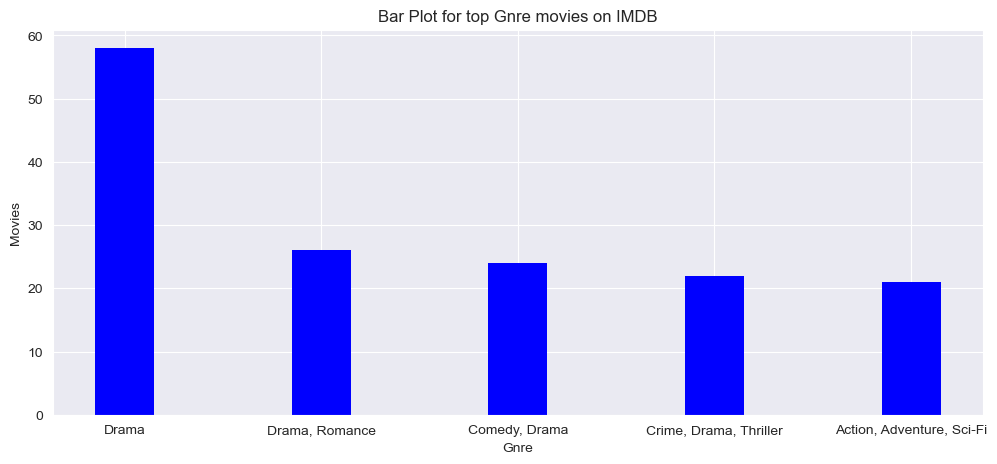

In [76]:
# simple plot graph using barplot 
fig = plt.figure(figsize = (12, 5))
Gnre=df2.Genre.head();
movies=df2.movies.head()
# creating the bar plot
plt.bar(movies,Gnre, color ='blue',width = 0.3,edgecolor = "none")
plt.xlabel("Gnre")
plt.ylabel("Movies")
plt.title("Bar Plot for top Gnre movies on IMDB")
plt.show()


# Identify the director with the most top-rated movies/TV shows by creating a new dataframe containing the count of movies/TV shows directed by each director using pandas.


In [54]:
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000"


In [63]:
# creating new dataframe showing directos with the top-most movies ratings
df_top_rating=df.Director.value_counts()
print(df_top_rating)

Steven Spielberg        13
Martin Scorsese         10
Alfred Hitchcock         9
Christopher Nolan        8
Clint Eastwood           8
                        ..
Jon Favreau              1
Yimou Zhang              1
Danis Tanovic            1
Shin'ichirô Watanabe     1
Richard Lester           1
Name: Director, Length: 402, dtype: int64


In [66]:
df_top_rating=pd.DataFrame(df_top_rating).reset_index(drop=True)
df_top_rating=df_top_rating.rename(columns={'index':'Name',"Director":"Count"})
df_top_rating

,Name,Count
0,Steven Spielberg,13
1,Martin Scorsese,10
2,Alfred Hitchcock,9
3,Christopher Nolan,8
4,Clint Eastwood,8
...,...,...
397,Jon Favreau,1
398,Yimou Zhang,1
399,Danis Tanovic,1
400,Shin'ichirô Watanabe,1


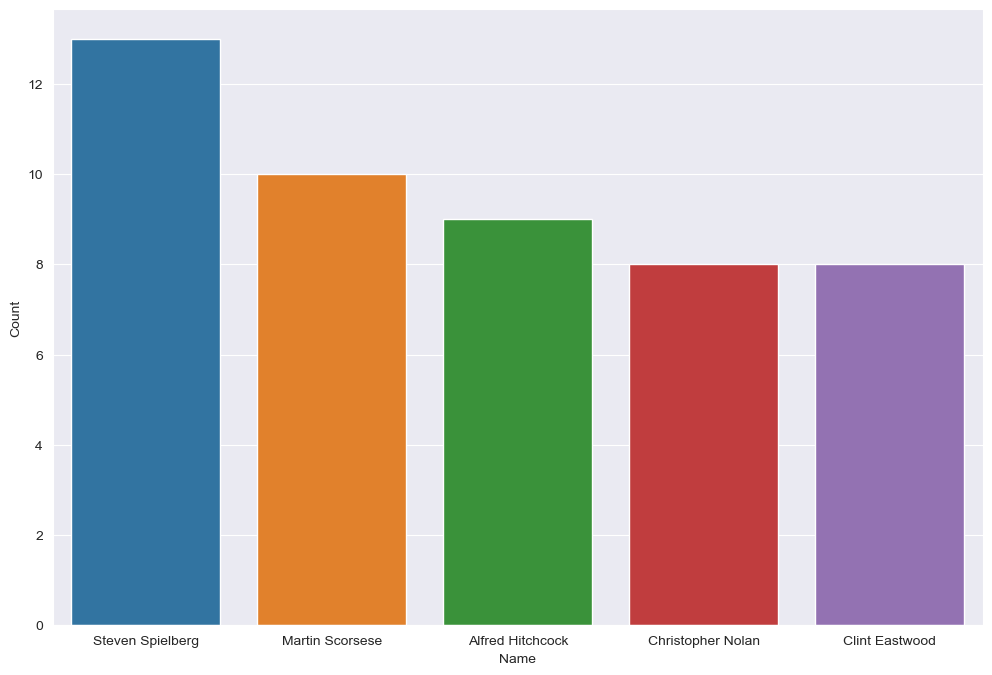

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
Name=df_top_rating.Name.head()
Count=df_top_rating.Count.head()
plt.figure(figsize=(12,8))
sns.barplot(Name, Count, data = df_top_rating)
plt.show()


# Write a report summarizing your analysis and findings, including any insights or observations you discovered, using markdown cells in the Jupyter notebook.

After analysing the dataset, it can be concluded that were approximately over 200 missing value, referred to as NaN which refers to (Not A Number). After cleaning the data and preparing it for simple analysis, various techniques were used to detect popularity movies and TV shows, it is observable that Drama ranked at the top and by doing brief plot, it can be seen the outcome. In addition, the dataset tend to prefer Steven Spielberg with over 13 movie registered and directed by him only, making him the at the top ranked of the list, followed by Martin Scorsese. This is a simple task required by GSG to enroll at online training, however, one can not fully comprehend the dataset as it has only 1000 rows which is quite small and in order to get full insights, more data is needed. In this brief summary, various plotting methods were used, including matplotlib and seaborn and it is obvious that seaborn produced modern-shape like plots and it is simple to implement, however, matplotlib remains essential.
